# CM3015 Machine Learning and Neural Network-Final coursework

#### 1.Introduction- Defining the problem

<p style='text-align: justify;'>KMNIST dataset (Kuzushiji-MNIST) is a collection of 10 classes, of single Kuzushiji (cursive Japanese) Hiragana characters written by hand in 28x28 images from traditional Japanese literature. It consists of 60,000 training and 10,000 test images which have been assigned to required labels or classification. The dataset has been created through scanning of thirty-five classical Japanese literature books dating from 18th century.  A bounding box was created for each character which later have been processed to fit the greyscale 28x28 pixel resolution.<sup>[2]</sup></p>
<p style='text-align: justify;'>Quantity of the dataset can be considered as a limiting factor in the context of performing in depth analysis of all the Hiragana characters. The original number of character are 46 but the data set contains only 10 characters thus the analysis will be based on smaller yet a defined set of characters.</p>
<p style='text-align: justify;'>The aim is to predict Hiragana characters from classic Japanese literature, spanning over ten classes currently representing the modern Hiragana characters. The classification type is defined as multiclass classification due to the presence of 10 different characters.</p>

#### 2.Selecting a measure of success

<p style='text-align: justify;'>Accuracy serves as the benchmark for my dataset's measure of success. As my aim invovles to correctly categorize Hiragana characters. Therefore accuracy is to be determined by dividing the total number of images by the number of images that were properly identified.</p>
<p style='text-align: justify;'>I've decided to use categorical crossentropy as my loss function. Multiclass classification issues are frequently solved using the loss function categorical crossentropy. By calculating the separation between the actual and projected probability distribution, it narrows the discrepancy between the actual probability distribution of the classes and the projected probability distribution. RMSprop will be the optimizer I employ to increase the prediction's accuracy by optimizing the loss function during training.</p>

#### 3.Deciding on an evaluation protocol

Standard evaluation Protocols are as follows:
1. Hold-out Validation set
2. Performing K-fold cross validation on the dataset
3. Performing iterated K-fold validation on the dataset.

<p style='text-align: justify;'>I'll be employing hold-out validation set and iterated K-fold cross-validation assessment methodology. The bias and variance of the estimator will be determined by the number of folds. For instance, a higher number of k-folds will result in a lower estimate's bias but a higher variance, and vice versa. I will be using 5 folds in the evalution protocol.</p>

#### 4.Preparing the dataset

###### 4.1 Importing required libraries

<p style='text-align: justify;'>In the step we will be importing required libraries and modules necessary for building various models and analysis of the chosen dataset. </p>

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras import models,layers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Activation
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

Kmnist_dataset is imported from tensorflow library. Further I will be initialising variables to store the dataset and information respectively.

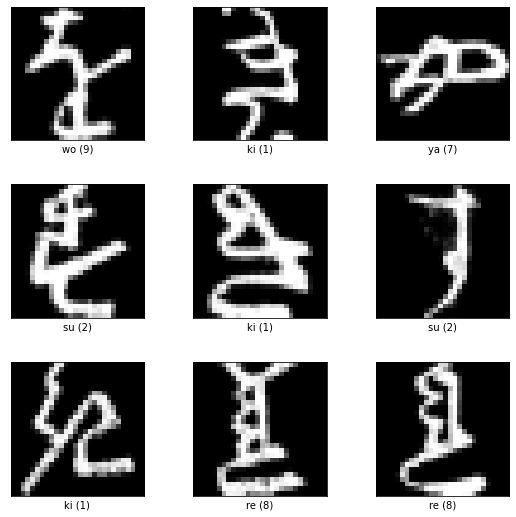

In [2]:
#importing dataset
import tensorflow_datasets as tfds

#initislising dataset_values and dataset_Information to store dataset and its information
dataset_values,dataset_Information=tfds.load('kmnist',split='all',with_info=True)

#displaying some examples of imgages and catergorised labels
sample_images=tfds.show_examples(dataset_values,dataset_Information)

###### 4.2 Load KMNIST-Dataset

Since the dataset consists of 60000 training and 10000 test images, I will importing and storing all the data into empty arrays, X and Y, representing images and labels respectively.

In [3]:
#initialising arrays
X_values=[]
Y_values=[]

#appending the arrays to add data
for ds in dataset_values: 
    X_values.append(ds["image"])
    Y_values.append(ds["label"])

#converting into an np.array
X_values = np.array(X_values)
Y_values = np.array(Y_values)

In [4]:
#printing shape of X_value,Y_value arrays
print("KMNIST_image:",X_values.shape)
print("KMNIST_label:",Y_values.shape)

KMNIST_image: (70000, 28, 28, 1)
KMNIST_label: (70000,)


Now that arrays consists of dataset, we would need to partition the dataset into training, validation and testing sets in the proportions of 75:15:15.

In [5]:
#initialising the proportions
trainDS_ratio=0.7
testDS_ratio=0.15
validationDS_ratio=0.15

#spliting the data using train_test_splitfunction 
X_trainVal,X_validVal,y_trainVal,y_validVal=train_test_split(X_values,Y_values,test_size=(1-trainDS_ratio),shuffle=True)
X_validVal,X_testVal,y_validVal,y_testVal=train_test_split(X_validVal,y_validVal,test_size=testDS_ratio/(testDS_ratio+validationDS_ratio),shuffle=True)

The following code involves the calculation and observation of spread among different labels.

In [6]:
#calculating the range of labels in training set
unique, count_value = np.unique(y_trainVal, return_counts=True)
print("Training labels: {}".format(dict(zip(unique, count_value))))

#calculating the range of labels in testing set
unique, count_value = np.unique(y_testVal, return_counts=True)
print("Testing labels: {}".format(dict(zip(unique, count_value))))

#calculating the range of labels in validation set
unique, count_value = np.unique(y_validVal, return_counts=True)
print("Validation labels: {}".format(dict(zip(unique, count_value))))

Training labels: {0: 4897, 1: 4892, 2: 4910, 3: 4864, 4: 4867, 5: 4962, 6: 4932, 7: 4852, 8: 4942, 9: 4881}
Testing labels: {0: 1087, 1: 1067, 2: 1043, 3: 1060, 4: 1042, 5: 989, 6: 1040, 7: 1092, 8: 1014, 9: 1067}
Validation labels: {0: 1016, 1: 1041, 2: 1047, 3: 1076, 4: 1091, 5: 1049, 6: 1028, 7: 1056, 8: 1044, 9: 1052}


In [7]:
#printing shapes of values
print('Kmnist_Train_Images:',X_trainVal.shape)
print('Kmnist_Train_Label:',y_trainVal.shape)
print('Kmnist_Test_Images:',X_testVal.shape)
print('Kmnist_Test_Label:',y_testVal.shape)
print('Kmnist_Validate_Images:',X_validVal.shape)
print('Kmnist_Validate_Label:',y_validVal.shape)

Kmnist_Train_Images: (48999, 28, 28, 1)
Kmnist_Train_Label: (48999,)
Kmnist_Test_Images: (10501, 28, 28, 1)
Kmnist_Test_Label: (10501,)
Kmnist_Validate_Images: (10500, 28, 28, 1)
Kmnist_Validate_Label: (10500,)


###### 4.3 Visualisation of data

Following code below will show 30 random sample images from the KMNIST dataset.

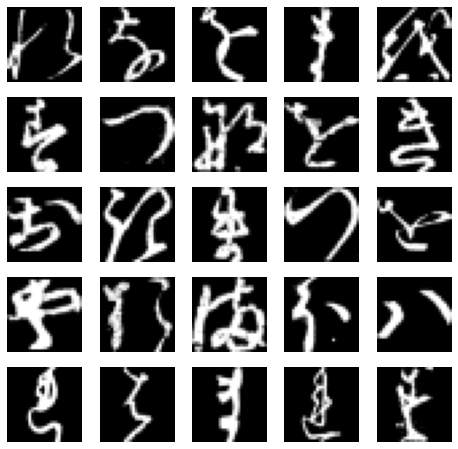

In [8]:
#getting 25 random characters from KMNIST
rand_index = np.random.choice(X_trainVal.shape[0], size=25, replace=False)
rand_images = X_trainVal[rand_index]
rand_labels = y_trainVal[rand_index]

#visualizing the 25 random KMNIST characters
plt.figure(figsize=(8,8))
#klooping over rand_index 
for img in range(len(rand_index)):
    #plotting images
    plt.subplot(5, 5, img + 1)
    rand_img = rand_images[img]
    plt.imshow(rand_img, cmap='gray')
    plt.axis('off')
plt.show()

###### 4.4 One-hot Encoding

To represent each label as a binary vector, the following code converts it into a one-hot encoded vector. This implies that operations within the model will be simpler.

In [9]:
#converting label_values into one-hot-enocded vectors
y_trainVal = to_categorical(y_trainVal)
y_testVal = to_categorical(y_testVal)
y_validVal=to_categorical(y_validVal)

###### 4.5 Pre-processing of images data

The following step are followed
1. Flattening 28x28 image array to vector datatype using reshape() function.
2. Normalising images by casting in float datatype and rescaling to values between 0 ands 1.

In [10]:
#reshaping and rescaling X_train_images
X_trainVal= X_trainVal.reshape((48999, 28*28))
X_trainVal = X_trainVal.astype('float32') / 255

#reshaping and rescaling X_test_images
X_testVal = X_testVal.reshape((10501,28 * 28))
X_testVal = X_testVal.astype('float32') / 255

#reshaping and rescaling X_validation_images
X_validVal= X_validVal.reshape((10500, 28*28))
X_validVal= X_validVal.astype('float32') / 255

Printing shape of processed data, to further be used by the models.

In [11]:
#printing shapes of values
print('Kmnist_Train_Images:',X_trainVal.shape)
print('Kmnist_Train_Label:',y_trainVal.shape)
print('Kmnist_Test_Images:',X_testVal.shape)
print('Kmnist_Test_Label:',y_testVal.shape)
print('Kmnist_Validate_Images:',X_validVal.shape)
print('Kmnist_Validate_Label:',y_validVal.shape)

Kmnist_Train_Images: (48999, 784)
Kmnist_Train_Label: (48999, 10)
Kmnist_Test_Images: (10501, 784)
Kmnist_Test_Label: (10501, 10)
Kmnist_Validate_Images: (10500, 784)
Kmnist_Validate_Label: (10500, 10)


#### 5.Evaluation Protocol I:Hold-Out Validation

In majority of the cases, Hold-out validation method of evaluation will be adequate for developing models.

<p style='text-align: justify;'><b>Setting Compile Parameters:</b> Optimizer, loss_function and metrics are rmsprop, catergorical_crossentropy and accuracy respectively, defined in the compile stage of all the models to be developed.</p>

<p style='text-align: justify;'><b>Plotting graphs on Loss and Accuracy:</b>These graphs help to inspect,establish the model is operating with highest accuracy possible and determine wheher the model in underfit, good-fit or overfit.</p>

###### 5.1 Underfit model 

<p style='text-align: justify;'>We will be creating a modest model that can outperform a basic baseline and use minimum requirements. Anything that achieves an accuracy better than 0.1 is considered to have statistical power. The model will consists of only required actiavtion layer, softmax.</p>

In [12]:
#initialising an empty underfit model
model_underfit = models.Sequential()
#adding softmax layer 
model_underfit.add(layers.Dense(10, activation='softmax'))
#initialising optimzer,loss_function and metrics 
model_underfit.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# training model to fit and input data
model_underfit_result=model_underfit.fit(X_trainVal, y_trainVal, epochs=5, batch_size=128, validation_split=0.15)

Epoch 1/5
326/326 [==============================] - 1s 2ms/step - loss: 0.9717 - accuracy: 0.7195 - val_loss: 0.7493 - val_accuracy: 0.7777
Epoch 2/5
326/326 [==============================] - 1s 2ms/step - loss: 0.7010 - accuracy: 0.7928 - val_loss: 0.6992 - val_accuracy: 0.7882
Epoch 3/5
326/326 [==============================] - 1s 2ms/step - loss: 0.6669 - accuracy: 0.8017 - val_loss: 0.6855 - val_accuracy: 0.7954
Epoch 4/5
326/326 [==============================] - 1s 2ms/step - loss: 0.6506 - accuracy: 0.8068 - val_loss: 0.6774 - val_accuracy: 0.8001
Epoch 5/5
326/326 [==============================] - 1s 2ms/step - loss: 0.6405 - accuracy: 0.8107 - val_loss: 0.6783 - val_accuracy: 0.7999


In [14]:
#synopsis of the layers present in model_underfit
model_underfit.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


Upon analysing the summary of the model, we can further inspect the model by plotting graphs based on accuracy and loss of the model. 

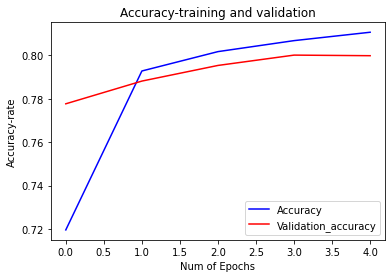

In [15]:
#accuracy-graphplot
plt.plot(model_underfit_result.history['accuracy'],'b')
plt.plot(model_underfit_result.history['val_accuracy'],'r')
#graph-title
plt.title('Accuracy-training and validation')
#graph-xaxisLabel
plt.xlabel('Num of Epochs')
#graph-yaxislabel
plt.ylabel('Accuracy-rate')
#graph-key/legend
plt.legend(['Accuracy', 'Validation_accuracy'])

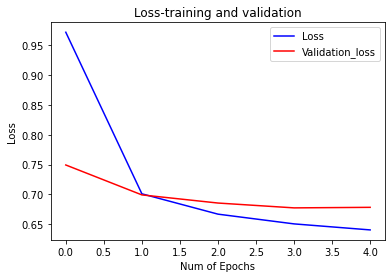

In [16]:
#loss-graphplot
plt.plot(model_underfit_result.history['loss'],'b')
plt.plot(model_underfit_result.history['val_loss'],'r')
#graph-title
plt.title('Loss-training and validation')
#graph-xaxisLabel
plt.xlabel('Num of Epochs')
#graph-yaxislabel
plt.ylabel('Loss')
plt.legend(['Loss', 'Validation_loss'])

In [17]:
#evaluating loss_testing and accur_testing  
loss_testing,accur_testing=model_underfit.evaluate(X_validVal,y_validVal)

329/329 [==============================] - 0s 808us/step - loss: 0.6677 - accuracy: 0.7999


The set of codes above represent developing a underfitting model and accuracy score achieved is 80%, adequate to exceed the baseline of 10%.

###### 5.2 Overfit model 

<p style='text-align: justify;'>After constructing a model that outperforms the baseline, we must create an overfitting model. To achieve the goal of we should produce a model that is on the border between overfitting and underfitting, we must cross the line to develop an overfitting model.</p>

<p style='text-align: justify;'>To accomplish an overfitting model, either the training should be expanded by increasing the number of epochs or a larger model should be constructed. These factors should be escalated till the validation data on which the network is evaluated begins to degrade.</p>

In [18]:
#Initialising an empty overfit model
model_overfit=models.Sequential()
#adding three layers with relu activation
model_overfit.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
model_overfit.add(layers.Dense(124,activation='relu'))
model_overfit.add(layers.Dense(46,activation='relu'))
#adding softmax layer
model_overfit.add(layers.Dense(10, activation='softmax'))
#initialising optimzer, loss_function and metrics and compiling the model
model_overfit.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
#training model_overfit to fit input values
model_overfit_result=model_overfit.fit(X_trainVal, y_trainVal, epochs=15, batch_size=64, validation_split=0.15,verbose=0)

In [20]:
#synopsis of layers consisted in model_overfit
model_overfit.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dense_2 (Dense)             (None, 124)               63612     
                                                                 
 dense_3 (Dense)             (None, 46)                5750      
                                                                 
 dense_4 (Dense)             (None, 10)                470       
                                                                 
Total params: 471,752
Trainable params: 471,752
Non-trainable params: 0
_________________________________________________________________


Upon analysing the summary of the model, we can further inspect the model by plotting graphs based on accuracy and loss of the model. 

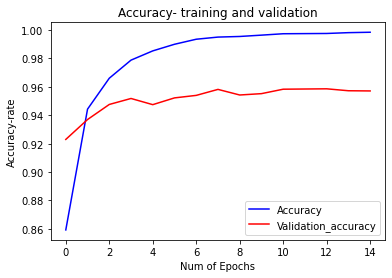

In [21]:
#accuracy-graphplot
plt.plot(model_overfit_result.history['accuracy'],'b')
plt.plot(model_overfit_result.history['val_accuracy'],'r')
#graph-title
plt.title('Accuracy- training and validation')
#graph-xaxislable
plt.xlabel('Num of Epochs')
#graph-yaxislabel
plt.ylabel('Accuracy-rate')
#graph-key
plt.legend(['Accuracy', 'Validation_accuracy'])

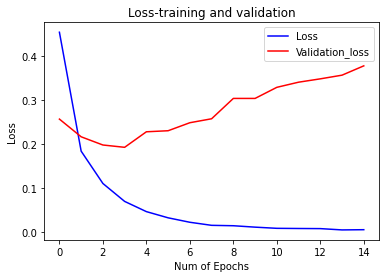

In [22]:
#loss-graphplot
plt.plot(model_overfit_result.history['loss'],'b')
plt.plot(model_overfit_result.history['val_loss'],'r')
#graph-title
plt.title('Loss-training and validation')
#graph-xaxisLabel
plt.xlabel('Num of Epochs')
#graph-yaxislabel
plt.ylabel('Loss')
plt.legend(['Loss', 'Validation_loss'])

In [23]:
#evaluating loss_testing and accur_testing
loss_testing,accur_testing=model_overfit.evaluate(X_validVal,y_validVal)

329/329 [==============================] - 1s 3ms/step - loss: 0.3563 - accuracy: 0.9579


<p style='text-align: justify;'>Graphs plotted on accuracy and loss represent extreme overfitting model as the difference is large between the lines.The set of codes above represent developing an overfitting model and accuracy_value achieved is 95%.</p>

###### 5.3 Regularising  the model

Methods to be followed on model are dropout and using L1 annd L2 regularization.

###### 5.3.1 Dropout
This method is an training approach in which some layers are randomly dropped.

In [24]:
#initialising an empty dropoutmodel network
dpModl = models.Sequential()
#extending layers
dpModl.add(layers.Dense(512, activation='relu', input_shape=(28 * 28, )))
#droupout-layer1
dpModl.add(layers.Dropout(0.5))
dpModl.add(layers.Dense(124,activation='relu'))
dpModl.add(layers.Dense(46,activation='relu'))
#dropout-layer2
dpModl.add(layers.Dropout(0.7))
dpModl.add(layers.Dense(10, activation='softmax'))
#initialising optimzer, loss_function and metrics and compiling 
dpModl.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
#training model to fit input values
dpModl_result=dpModl.fit(X_trainVal, y_trainVal, epochs=15, batch_size=128,validation_split=0.15,verbose=0)

In [26]:
#synopsis of layers in dpModl 
dpModl.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 124)               63612     
                                                                 
 dense_7 (Dense)             (None, 46)                5750      
                                                                 
 dropout_1 (Dropout)         (None, 46)                0         
                                                                 
 dense_8 (Dense)             (None, 10)                470       
                                                                 
Total params: 471,752
Trainable params: 471,752
Non-tr

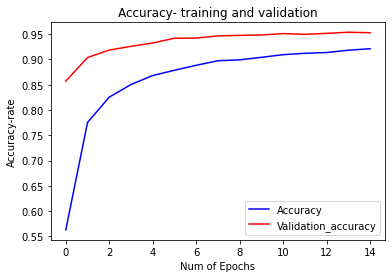

In [27]:
#accuracy-graphplot
plt.plot(dpModl_result.history['accuracy'],'b')
plt.plot(dpModl_result.history['val_accuracy'],'r')
#graph-title
plt.title('Accuracy- training and validation')
#graph-xaxislable
plt.xlabel('Num of Epochs')
#graph-yaxislabel
plt.ylabel('Accuracy-rate')
#graph-key
plt.legend(['Accuracy', 'Validation_accuracy'])

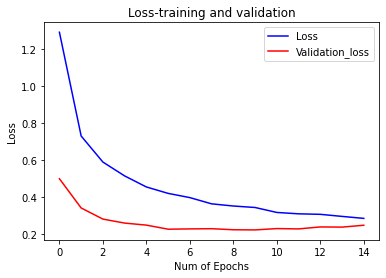

In [28]:
#loss-graphplot
plt.plot(dpModl_result.history['loss'],'b')
plt.plot(dpModl_result.history['val_loss'],'r')
#graph-title
plt.title('Loss-training and validation')
#graph-xaxisLabel
plt.xlabel('Num of Epochs')
#graph-yaxislabel
plt.ylabel('Loss')
plt.legend(['Loss', 'Validation_loss'])

The graphs show that adding dropout layers has resulted in a difference between training and validation sets, since the lines do not meet at any point.

In [29]:
#evaluating loss_testing and accur_testing
loss_testing,accur_testing= dpModl.evaluate(X_validVal,y_validVal)

329/329 [==============================] - 1s 2ms/step - loss: 0.2284 - accuracy: 0.9522


###### 5.3.2 L1/ L2 Regularization protocol

L1-regularization is based on absolute value of loss function while L2-regularization is based on squared magnitude of loss-function.<sup>[3]</sup>

In [30]:
#initialising an empty LRModel
LRModl= models.Sequential()
#expanding network by increasing layers
LRModl.add(layers.Dense(512, activation='relu', input_shape=(28 * 28, )))
#L1-regularization 
LRModl.add(layers.Dense(124,kernel_regularizer=regularizers.l1(0.01),activation='relu'))
#L2-regularization 
LRModl.add(layers.Dense(46,kernel_regularizer=regularizers.l2(0.01),activation='relu'))
LRModl.add(layers.Dense(10, activation='softmax'))
#initialising optimzer, loss_function and metrics and compiling 
LRModl.compile(optimizer='rmsprop',loss='categorical_crossentropy',  metrics=['accuracy'])

In [31]:
#training model to fit input values
LRModl_result=LRModl.fit(X_trainVal, y_trainVal, epochs=15, batch_size=128,validation_split=0.15,verbose=0)

In [32]:
#synopsis of layers consisted in LRModl
LRModl.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               401920    
                                                                 
 dense_10 (Dense)            (None, 124)               63612     
                                                                 
 dense_11 (Dense)            (None, 46)                5750      
                                                                 
 dense_12 (Dense)            (None, 10)                470       
                                                                 
Total params: 471,752
Trainable params: 471,752
Non-trainable params: 0
_________________________________________________________________


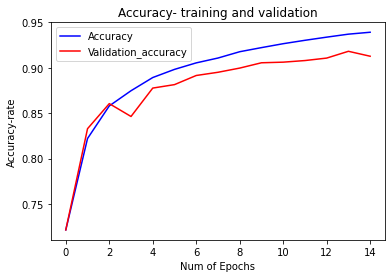

In [33]:
#accuracy-graphplot
plt.plot(LRModl_result.history['accuracy'],'b')
plt.plot(LRModl_result.history['val_accuracy'],'r')
#graph-title
plt.title('Accuracy- training and validation')
#graph-xaxislable
plt.xlabel('Num of Epochs')
#graph-yaxislabel
plt.ylabel('Accuracy-rate')
#graph-key
plt.legend(['Accuracy', 'Validation_accuracy'])

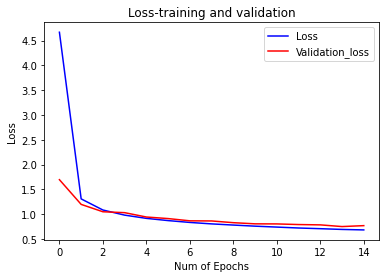

In [34]:
#loss-graphplot
plt.plot(LRModl_result.history['loss'],'b')
plt.plot(LRModl_result.history['val_loss'],'r')
#graph-title
plt.title('Loss-training and validation')
#graph-xaxisLabel
plt.xlabel('Num of Epochs')
#graph-yaxislabel
plt.ylabel('Loss')
plt.legend(['Loss', 'Validation_loss'])

<p style='text-align: justify;'>The graphs show that adding l1 and l2 layers led the model to overfit between training and validation sets, as the difference between lines is small.</p>

In [35]:
#evaluating loss_testing and accur_testing
loss_testing,accur_testing= LRModl.evaluate(X_validVal,y_validVal)

329/329 [==============================] - 1s 2ms/step - loss: 0.7629 - accuracy: 0.9122


###### 5.4 Final model

This model consists of both dropout and L1/L2 regularization layers.

In [36]:
#initialising an empty FlModl
FlModl = models.Sequential()
#expanding network by increasing layers
FlModl.add(layers.Dense(512, activation='relu', input_shape=(28 * 28, )))
#dropout-layer
FlModl.add(layers.Dropout(0.2))
#l1regularizer-layer
FlModl.add(layers.Dense(124,kernel_regularizer=regularizers.l1(0.001),activation='relu'))
FlModl.add(layers.Dense(46,activation='relu'))
#softmaxLayer
FlModl.add(layers.Dense(10, activation='softmax'))
#initialising optimzer, loss_function and metrics and compiling
FlModl.compile(optimizer='rmsprop',
               loss='categorical_crossentropy', 
               metrics=['accuracy'])

In the final-model, training and validation set values are concatenated and and passed to fit the model.We will train on the entire training set rather than just a portion of it.

In [37]:
#training model to fit input values
FlModl_result=FlModl.fit(np.concatenate([X_trainVal,X_validVal]),
                        np.concatenate([y_trainVal,y_validVal]),epochs=15, batch_size=128,validation_split=0.15,verbose=0)

In [38]:
#synopsis of layers consisted in LRModl
FlModl.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 512)               401920    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_14 (Dense)            (None, 124)               63612     
                                                                 
 dense_15 (Dense)            (None, 46)                5750      
                                                                 
 dense_16 (Dense)            (None, 10)                470       
                                                                 
Total params: 471,752
Trainable params: 471,752
Non-trainable params: 0
_________________________________________________________________


In [39]:
#evaluating loss_testing and accur_testing
loss_testing,accur_testing= FlModl.evaluate(X_testVal,y_testVal)

329/329 [==============================] - 1s 2ms/step - loss: 0.3007 - accuracy: 0.9467


We will use numerous metrics to analyze the model in order to establish that our final model is correct.
1. Precision score
2. Recall score
3. F1 score
4. Confusion matrix
5. Assesement on test data

<p style='text-align: justify;'>In the code cell before,evalution process is performed on test values to obtain accurcay and loss occurred by using the dataset. Accuracy rate achieved is 95% while loss achieved is 0.2640 .</p>

In [40]:
#initialising predicted values
y_predictVal=FlModl.predict(X_testVal)

#reshaping values from 10 to values between -1 and 1
y_testVal=y_testVal.reshape(-1,1)
y_predictVal=y_predictVal.reshape(-1,1)

y_testVal=np.argmax(y_testVal,axis=1)
y_predictVal=np.argmax(y_predictVal,axis=1)

329/329 [==============================] - 1s 2ms/step


In [41]:
#calculating and obtaining values
precision_value=precision_score(y_testVal,y_predictVal,average='micro')
recall_value=recall_score(y_testVal,y_predictVal,average='micro')
f1_value=f1_score(y_testVal,y_predictVal,average='micro')

In [42]:
print("Precision value:",precision_value)
print("Recall value:",recall_value)
print("F1 score:",f1_value)

Precision value: 1.0
Recall value: 1.0
F1 score: 1.0


Text(69.0, 0.5, 'truth')

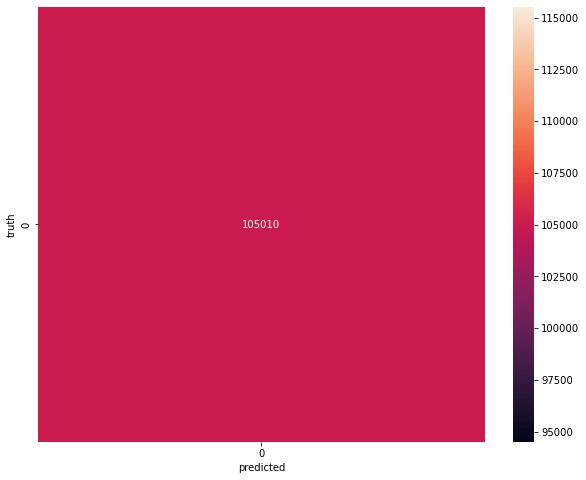

In [43]:
#confusion matrix
conf_Mat=confusion_matrix(y_testVal,y_predictVal)
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(conf_Mat,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')

This signifies that all of your positive samples are classified correctly and that none of your positive samples are wrongly classified.

###### 5.5 Conclusion

<p style='text-align: justify;'>Based on the assessment criteria shown above, we can conclude that the model can perform well and give relatively accurate outcomes at 95%. With the trained model, we can make accurate predictions.</p>

#### 6.Evaluation Protocol II: Iterated K fold

<p style='text-align: justify;'>The samples are insufficient for performing a deep learning project because the dataset has a maximum of 70000 samples. This indicates that our dataset is short, resulting in even smaller validation and partial training sets. A small validation set makes the validation scores more sensitive to the set's composition, which influences the data points after dividing the data. Therfore,iterated K fold would be approriate method of evaluating this dataset.</p>

###### 6.1 Pre-processing of images data

In [44]:
#initialising arrays
X_values=[]
Y_values=[]

#appending the arrays to add data
for ds in dataset_values: 
    X_values.append(ds["image"])
    Y_values.append(ds["label"])

#converting into an np.array
X_values = np.array(X_values)
Y_values = np.array(Y_values)

<p style='text-align: justify;'>There is no need to split training set at the because we'll split it into partial training and validation sets.The training data will be divided into K equal-sized chunks and trained on the remaining partitions; this procedure will be repeated K times with different validation sets. Before separating into K-portions, the K fold is iterated numerous times and scrambled each time.</p>

In [45]:
#initialising the proportions
trainDs_ratio=0.75
testDs_ratio=0.25

#spliting the data using train_test_splitfunction 
X_trainVal,X_testVal,y_trainVal,y_testVal=train_test_split(X_values,Y_values,test_size=(1-trainDs_ratio))

In [46]:
#printing shapes of values
print('Kmnist_Train_Images:',X_trainVal.shape)
print('Kmnist_Train_Label:',y_trainVal.shape)
print('Kmnist_Test_Images:',X_testVal.shape)
print('Kmnist_Test_Label:',y_testVal.shape)

Kmnist_Train_Images: (52500, 28, 28, 1)
Kmnist_Train_Label: (52500,)
Kmnist_Test_Images: (17500, 28, 28, 1)
Kmnist_Test_Label: (17500,)


In [47]:
#reshaping and rescaling X_train_images
X_trainVal= X_trainVal.reshape((52500, 28*28))
X_trainVal= X_trainVal.astype('float32') / 255

#reshaping and rescaling X_test_images
X_testVal= X_testVal.reshape((17500,28 * 28))
X_testVal= X_testVal.astype('float32') / 255

In [48]:
#converting label_values into one-hot-enocded vectors
y_trainVal = to_categorical(y_trainVal)
y_testVal = to_categorical(y_testVal)

In [49]:
#printing shapes of values
print('Kmnist_Train_Images:',X_trainVal.shape)
print('Kmnist_Train_Label:',y_trainVal.shape)
print('Kmnist_Test_Images:',X_testVal.shape)
print('Kmnist_Test_Label:',y_testVal.shape)

Kmnist_Train_Images: (52500, 784)
Kmnist_Train_Label: (52500, 10)
Kmnist_Test_Images: (17500, 784)
Kmnist_Test_Label: (17500, 10)


Now that we have pre-processed the dataset, three different K-fold models will be implemented. 

<p style='text-align: justify;'><b>Setting Compile Parameters:</b> Optimizer, loss_function and metrics are defined as rmsprop, catergorical_crossentropy and MAE(mean absolute error) respectively, defined in the compile stage of all the models to be developed.</p>


###### 6.2 UnderFit-KModel

I will carrying out the iterated Kfold on the underfit model performed in the holdout validation method and check whether this model performs more than the baseline.

In [50]:
#initialising an empty underfit_KModel
undfit_KModl = models.Sequential()
#softmax layer
undfit_KModl.add(layers.Dense(10, activation='softmax'))
#initialising optimzer, loss_function and metrics and compiling the model
undfit_KModl.compile(optimizer='rmsprop',
               loss='categorical_crossentropy', 
               metrics=['mae'])

In [51]:
#initialising variables
KNum=4
vald_Samplenum=len(X_trainVal)//KNum
epochNum=20
iterateNum=4
foldNum=5

#iterating over datavalues
for p in range(iterateNum):
    #initialising strkFld
    strKfld=StratifiedKFold(n_splits=foldNum,shuffle=True)
    
    for q, (trainset_ind, validset_ind) in enumerate(strKfld.split(X_trainVal, y_trainVal.argmax(1))):
        print('Processing-fold value',q)
        
        part_dataTrain=X_trainVal[trainset_ind]
        dataValid=X_trainVal[validset_ind]
        
        part_targetTrain=y_trainVal[trainset_ind]
        targetValid=y_trainVal[validset_ind]
        
        undfit_KModl.fit(np.concatenate([part_dataTrain,dataValid]),
                            np.concatenate([part_targetTrain,targetValid]),
                            verbose=0,
                            epochs=epochNum,
                            batch_size=vald_Samplenum)

Processing-fold value 0
Processing-fold value 1
Processing-fold value 2
Processing-fold value 3
Processing-fold value 4
Processing-fold value 0
Processing-fold value 1
Processing-fold value 2
Processing-fold value 3
Processing-fold value 4
Processing-fold value 0
Processing-fold value 1
Processing-fold value 2
Processing-fold value 3
Processing-fold value 4
Processing-fold value 0
Processing-fold value 1
Processing-fold value 2
Processing-fold value 3
Processing-fold value 4


In [52]:
#evaluating loss_testing and accur_testing
loss_testing,accur_testing= undfit_KModl.evaluate(X_testVal,y_testVal)

547/547 [==============================] - 1s 882us/step - loss: 0.6597 - mae: 0.0581


###### 6.2 Overfit-KModel

I will carrying out the iterated Kfold on the overfit model performed in the holdout validation method and analyze the performanace of this model.

In [53]:
#overfit
ovrfit_KModl= models.Sequential()
ovrfit_KModl.add(layers.Dense(512, activation='relu', input_shape=(28 * 28, )))
ovrfit_KModl.add(layers.Dense(124,activation='relu'))
ovrfit_KModl.add(layers.Dense(46,activation='relu'))
ovrfit_KModl.add(layers.Dense(10, activation='softmax'))
ovrfit_KModl.compile(optimizer='rmsprop',
               loss='categorical_crossentropy', 
               metrics=['mae'])

In [54]:
#initialising variables
KNum=4
vald_Samplenum=len(X_trainVal)//KNum
epochNum=30
iterateNum=4
foldNum=5

#iterating over datavalues
for p in range(iterateNum):
    #initialising strkFld
    strKfld=StratifiedKFold(n_splits=foldNum,shuffle=True)
    
    for q, (trainset_ind, validset_ind) in enumerate(strKfld.split(X_trainVal, y_trainVal.argmax(1))):
        print('Processing-fold value',q)
        
        part_dataTrain=X_trainVal[trainset_ind]
        dataValid=X_trainVal[validset_ind]
        
        part_targetTrain=y_trainVal[trainset_ind]
        targetValid=y_trainVal[validset_ind]
        
        ovrfit_KModl.fit(np.concatenate([part_dataTrain,dataValid]),
                            np.concatenate([part_targetTrain,targetValid]),
                            verbose=0,
                            epochs=epochNum,
                            batch_size=vald_Samplenum)

Processing-fold value 0
Processing-fold value 1
Processing-fold value 2
Processing-fold value 3
Processing-fold value 4
Processing-fold value 0
Processing-fold value 1
Processing-fold value 2
Processing-fold value 3
Processing-fold value 4
Processing-fold value 0
Processing-fold value 1
Processing-fold value 2
Processing-fold value 3
Processing-fold value 4
Processing-fold value 0
Processing-fold value 1
Processing-fold value 2
Processing-fold value 3
Processing-fold value 4


In [55]:
#evaluating loss_testing and accur_testing
loss_testing,accur_testing= ovrfit_KModl.evaluate(X_testVal,y_testVal)

547/547 [==============================] - 2s 4ms/step - loss: 0.2721 - mae: 0.0083


###### 6.3 Final K iterated model

In [56]:
finalKfit_Modl= models.Sequential()
finalKfit_Modl.add(layers.Dense(512, activation='relu', input_shape=(28 * 28, )))
finalKfit_Modl.add(layers.Dense(46,activation='relu'))
finalKfit_Modl.add(layers.Dense(10,activation='softmax'))
finalKfit_Modl.compile(optimizer='rmsprop',
               loss='categorical_crossentropy', 
               metrics=['mae'])

In [57]:
#initialising variables
KNum=4
vald_Samplenum=len(X_trainVal)//KNum
epochNum=27
iterateNum=4
foldNum=5

#iterating over datavalues
for p in range(iterateNum):
    #initialising strkFld
    strKfld=StratifiedKFold(n_splits=foldNum,shuffle=True)
    
    for q, (trainset_ind, validset_ind) in enumerate(strKfld.split(X_trainVal, y_trainVal.argmax(1))):
        print('Processing-fold value',q)
        
        part_dataTrain=X_trainVal[trainset_ind]
        dataValid=X_trainVal[validset_ind]
        
        part_targetTrain=y_trainVal[trainset_ind]
        targetValid=y_trainVal[validset_ind]
        
        finalKfit_Modl.fit(np.concatenate([part_dataTrain,dataValid]),
                            np.concatenate([part_targetTrain,targetValid]),
                            verbose=0,
                            epochs=epochNum,
                            batch_size=vald_Samplenum)

Processing-fold value 0
Processing-fold value 1
Processing-fold value 2
Processing-fold value 3
Processing-fold value 4
Processing-fold value 0
Processing-fold value 1
Processing-fold value 2
Processing-fold value 3
Processing-fold value 4
Processing-fold value 0
Processing-fold value 1
Processing-fold value 2
Processing-fold value 3
Processing-fold value 4
Processing-fold value 0
Processing-fold value 1
Processing-fold value 2
Processing-fold value 3
Processing-fold value 4


In [58]:
#evaluating loss_testing and accur_testing
loss_testing,accur_testing= finalKfit_Modl.evaluate(X_testVal,y_testVal)

547/547 [==============================] - 2s 2ms/step - loss: 0.2376 - mae: 0.0090


###### 6.4 Conclusion of IteratedK

<p style='text-align: justify;'>Based on the assessment of the different models conducted above, we may conclude that the model is capable of producing somewhat accurate results, as seen by the prediction error on unknown data. Based on the minimal prediction error, we can conclude that the model is capable of performing effectively and producing reliable results.</p>

<p>The final model has the loss of 0.2376 and mean absolute value of 0.0090 which are providing optimum results.</p>

#### 7. Analysis

<p style='text-align: justify;'>The dataset was trained using two separate models that were able to give quite accurate predictions. Whilst these models use distinct evaluation methods, they share network layers in that iterated k fold requires fewer epochs while hold out validation requires dropout layers and l1.l2 regularizers.</p>

<p style='text-align: justify;'>The metric on the evaluation protocol differs when rmsprop is used as the opitimizer and catergorical crossentropy is used as the loss function (accuracy vs mean absolute error).</p>

<p style='text-align: justify;'>I was able to create two separate models utilizing two different assessment processes, with both models having a similar shape. The hold out validation model produced an accuracy of 94.67%, the prediction error was 100-94.67=5.33%, and the iterated k fold model produced a mea value of 0.0090 X100=0.9%. As a result, we may infer that the iterated k fold model is better suited for this dataset to give accyrate predictions.</p>

### References

1.tensorflow dataset source, Available:Online      
https://www.tensorflow.org/datasets/catalog/kmnist

2.KMNIST information source, Available:Online
https://datasets.activeloop.ai/docs/ml/datasets/kmnist/

3.L1 and L2 regularization methods, Available:Online
https://builtin.com/data-science/l2-regularization